In [1]:
%run Latex_macros.ipynb 


<IPython.core.display.Latex object>

Macro `_latex_std_` created. To execute, type its name (without quotes).
=== Macro contents: ===
get_ipython().run_line_magic('run', 'Latex_macros.ipynb ')
 

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
         
    
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import recipe_helper
%aimport recipe_helper
rh = recipe_helper.Recipe_Helper()

# Overview

## Goals
- Learn the "Recipe for Machine Learning"
    - a *systematic approach* to problem solving
    - a formal way of presenting your ideas
- Terminology
- Introduction to the sklearn API
    

## Plan
- Will illustrate the recipe using a model familiar to you: Linear Regression
    - Supervised learning: Regression 
        - numerical features, target
        - categorical variables: next lecture
- Focus is on the *concept*, not the code
- Similar to book (Geron, Chapter 2), but not identical.
- Let's jump in ! Start *doing* ML
- Your first assignment !
    - checkpoint: your knowledge of Regression *and* programming tools

Since this is our first lecture involving code
- I will show a lot more code within this notebook than in subsequent notebooks
- In the future, most of this code will be moved to separate modules
    - re-usable as a module, rather than copy/paste between notebooks
    - notebooks are less cluttered; maintain focus on the problem, not the code
- I will digress from the problem in order to solidify  your understanding of the tools: 
    - Jupyter, Pandas, etc.

<div class="alert alert-block alert-danger">
    <b>Disclaimer:</b> 
    <br>
    The purpose of this lecture is <i>not</i> to make you an expert in sklearn. 
    <br>
    It is to introduce you to concepts that you can apply no matter what toolkit you use in the future.
    
</div>

# Recipe for ML

How to approach a problem

How to present a solution
- This is our model for how to write a notebook

- Geron: Chapter2 (End to End)
- Checklist in Appendix B as a template for problem-solving (and writing notebooks)

Machine Learning is a **process**, not just a collection of models
- multiple steps
- iterative
- Focus only on Model ? Mistake !
    - Exploratory Data Analysis will inform you decisions
    - Tranformations often the secret to success

<center><b>Process</b>
<img src=images/ML_process.jpg>
</center>

We will illustrate this with a toy example, and introduce our first model(Regression) at the same time.

This will be very high level.

We will make a second pass over the topics we gloss over on the first pass.

## Frame the problem
- What problem are we trying to solve ?
- Why is it important ?
- Define terms


### Our problem

We are in the real-estate business.
The general belief is that larger houses command premium prices.
To test this, we gathered a history of home sales with associated house size and price.
(We normalize both the size and price so that 0 means average)

A seller asks us to appraise her house.  Our problem is to predict a price premium for her home, given it's size.


Our observations are (size, price) pairs.  The "target" we seek to predict is price.


#### Notation
- a training example is a pair $(\x^\ip,\y^\ip)$ consisting of 
    - a feature vector $\x^\ip$ of length $n$
    - the associated label (target) $\y^\ip$
- We are given $m$ training examples
    - Use superscript $\ip$ to index elements of a collection
        - $i^{th}$ example in $\X$: features $\x^\ip$ and target (label) $\y^\ip$
    - $\X$ is of dimension $m \times n$
    - $\y$ is dimension $m \times 1$, i.e., target is a single, continous value per example
    - Use hat to denote prediction: $\hat{\y}^\ip$
  

### Select a performance measure
- How do we decide that we have "solved" the problem ?
- Define a measure of how good our current solution is
    - success defined "out of sample", i.e., on unseen data **not** on the training set
        - can compute this "in sample" on the training set as well, but the metric of success is on the test set
- Our ML recipe will iteratively seek to improve this measure

#### Root Mean Square Error: an absolute performance metric

Our problem is to predict continous values, so it falls into the Regression topic.

- A common performance measure for Regression is the Root Mean Square Error (RMSE):

$$\textrm{RMSE}(\hat{\y}, \y) = \sqrt{ { 1\over{m}} \times \sum_{i=1}^m { ( \y^\ip - \hat{\y}^\ip)^2} }$$

Our goal is to minimize the RMSE by making each prediction $\hat{y}^\ip$ close to the true value $y^\ip$.

n.b., we will sometimes ignore the square root
$$\textrm{MSE}(\hat{\y}, \y) = \text{RMSE}(\hat{\y}, \y)^2$$

#### Digression: $R^2$, A relative performance metric

Whereas RMSE is absolute error (in same units as $y$), $R^2$ is a relative error (in units of percent).

$$ 
\begin{array}{ll}
R^2 & = & 1 - \left( \frac{\sum_{i=1}^m { (y_i - \hat{y}_i)^2} }{ \sum_{i=1}^m { (y_i -  \bar{y}_i)^2} }   \right) \\
& = & 1 - \left(  \frac{m \cdot \textrm{RMSE}(\hat{y}, y)^2} { \sum_{i=1}^m { (y_i -  \bar{y}_i)^2}} \right)
\end{array}
$$

**Interpretation**: Performance compared to a naive baseline estimator (predict mean $\bar{y}$)

## Get the data and have a first look

- The dirty secret of ML: Getting the data (and cleaning it) is 70-80% of the effort !
    - Data usually doesn't come in a neatly wrapped package
        - Multiple data sources
        - Multiple tables that need to be joined
            - Pandas is great for data wrangling !
            - Separate module (later) on data munging
        - Once you have the data it may need to be:
            - cleaned: deal with missing values and outliers
            - normalized, transformed, feature selection/creation
    - This week's assignment will force you to confront data
            

In this toy example I will give you a simple function that gives you the data in near-final form.
 - Don't expect this to happen too often !
 - We will revisit this topic in depth

In [4]:
# I will give you the data via a function (so I can easily alter the data in subsequent examples)
v1, a1 = 1, .005
X, y = rh.gen_data(num=50, v=v1, a=a1)


<div class="alert alert-block alert-success">
<b>TIP</b>


- Copy-and-paste in notebooks is discouraged: it is error-prone (hard to be consistent once you make a change) and not very re-usable.

- Invest the time into creating routines.  Even better: create Python Classes, with flexible, reusable methods.
 </div>

<div class="alert alert-block alert-success">
    <b>Tip</b>
    <ul>
    <li>You will probably come to regret calling variables with generic names like  X, y.
    <li>You often find yourself modifying these values.  If you try to re-run a previous self after having modified X and y, you will get <b>different</b> results which you will find confusing.
    </ul>
    
</div>  

In [5]:
# Practical advice:
X_lin, y_lin = X, y

### Aside: Illustrate Jupyter ? and ??

Notice that I'm generating the data via a method `gen_data` in a module ?

- What does `gen_data` do ? Try: `rh.gen_data?`
- What is the *code* for `gen_data`? Try: `rh.gen_data??`

In [6]:
# Uncomment the below line to see the "help" and "code" for the gen_data method
# rh.gen_data?

### Here's what the data looks like (life is so much easier with Pandas !)

In [7]:
import pandas as pd
df = pd.DataFrame( { "X": X_lin.ravel(), "y":y_lin.ravel()})
df.head()

df.info()
df.describe()

,X,y
0,24.835708,26.377739
1,-6.913215,-6.793734
2,32.384427,35.006305
3,76.151493,90.649117
4,-11.707669,-11.364995


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
X    50 non-null float64
y    50 non-null float64
dtypes: float64(2)
memory usage: 880.0 bytes


,X,y
count,50.000000,50.000000
mean,-11.273695,-5.616563
std,46.683439,45.278755
min,-97.983506,-73.981587
25%,-43.048955,-38.374426
50%,-11.707258,-11.364609
75%,16.813778,17.521546
max,92.613909,114.057250


#### But if we don't have Pandas, Numpy to the rescue:

In [8]:
print("y:\n size={}\n mean={}\n std={}\n min={}\n max={}\n".format( 
      y_lin.size,  y_lin.mean(), y_lin.std(), y_lin.min(), y_lin.max()
                                                                  )
     )

y:
 size=50
 mean=-5.616563210748966
 std=44.823680417643054
 min=-73.98158747882019
 max=114.05724968049518



In [9]:
# For the sharp-eyed: note the difference between y.std() and df["Y"].std()
# We prove below that this is because they are using different denominators (population vs sample) in the std. deviation calculation
print("y.std() = {ys:3.2f}, df[\"Y\"].std() = {Ys:3.2f}".format(ys=y.std(), Ys=df["y"].std()) )
      
print (  (y_lin.size *y_lin.std()**2) -  ( (y_lin.size-1) * df["y"].std()**2 )   )

y.std() = 44.82, df["Y"].std() = 45.28
0.0


### Create a test set and put it aside !
- Our ultimate goal is to predict well, out of sample
- This is called *generalization*
- Our success on the test set is our final measure
- We will revisit this later
    - Bottom line: you may look at the test set *only once*, at the end

The reason to put the test set aside is that we want a completely fair evaluation of out of sample performance.

Peaking at the test set might give you some clues on building the model, which would bias the evaluation.

It's like seeing an exam before test-time: if you know the questions in advance you don't need to prepare for anything not on the exam.

This will give you a high score on the exam, but you won't prepare you broadly (i.e., you will fail to generalize).

Even peaking at the test set might bias you unconciously.

It is very easy to accidentally incorporate information from the test set into training.

Just don't do it !

<div class="alert alert-block alert-danger">
    <b>Cheating alert:</b> 
    <ul>
    <li>You should use the test set <b>only once</b>, at the end of the process.
    <li>For pedagogical purposes only: we will look at the test set many times in the beginning of this lecture.
    <li>By the end of the lecture, you will learn to use something else (the validation set) in its place for the purpose of training.
    <li>In general, using the test set more than once, at the end of the process, is something to avoid
    </ul>   
</div>

In [10]:
X_train, X_test, y_train, y_test = rh.split(X_lin,y_lin)

X_train.shape, X_test.shape
y_train.shape, y_test.shape

((40, 1), (10, 1))

((40, 1), (10, 1))

In [11]:
type(X_lin)
type(X_train)

numpy.ndarray

numpy.ndarray

## Discover and Visualize Data to gain insights

- Our goal is to come up with a Hypothesis (Model) that explains the relation between features($\x$) and targets ($\y$)
- We explore our data to search for features that may aid in predicting the target
- This may suggest an initial Hypothesis

We do this on the **training** data only ! No peeking at the test data !

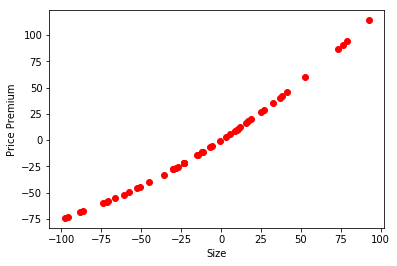

In [12]:
(xlabel, ylabel) = ("Size", "Price Premium")
rh.gen_plot(X_lin, y_lin, xlabel, ylabel)

### Nothing better than visualizing !

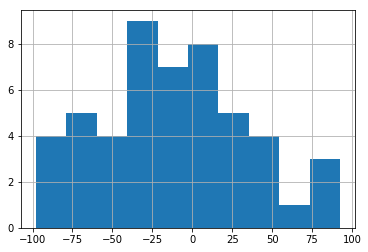

In [13]:
_= df["X"].hist()  # See why Pandas is so convenient ?

# BTW, what's with this "_ = ..." business ?

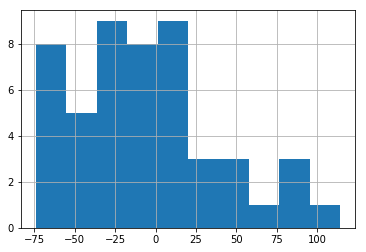

In [14]:
_= df["y"].hist()

#### But if we don't have Pandas, can use Matplotlib

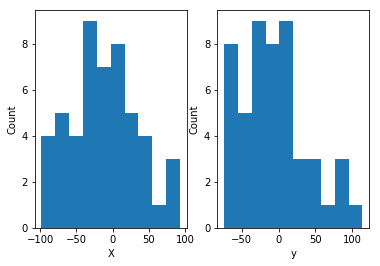

In [15]:
# Use the Object-Oriented interface to Matplotlib, NOT the MATLAB interface
# Create a figure
fig = plt.figure()

# Create a histogram for X.  The figure will be 1 row by 2 columns and the plot for X will be in column 1
ax = fig.add_subplot(121)
_ = ax.hist(X)
_ = ax.set_xlabel("X"); _ = ax.set_ylabel("Count")

# Create a histogram for Y.  The figure will be 1 row by 2 columns and the plot for X will be in column 2
ax = fig.add_subplot(122)
_ = ax.hist(y_lin)
_ = ax.set_xlabel("y"); _ = ax.set_ylabel("Count")


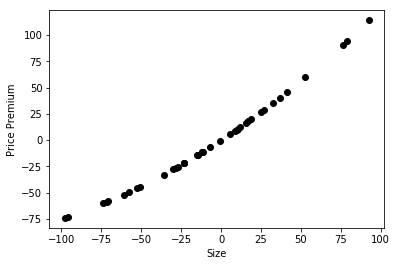

In [16]:
# Plot the target vs one feature
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)

_ = ax.scatter(X_train, y_train,  color='black')
_ = ax.set_xlabel(xlabel)
_ = ax.set_ylabel(ylabel)

Relationship between Size and Price could be linear.

That will be our initial hypothesis

## Prepare the data
- Your exploration of the data may have revealed issues that need to be addressed before modeling
    - Dirty data
    - There may be features at vastly different scales; may need to re-scale
    - Need to select or eliminate features
    - Need to create synthetic features
        - How to handle Categorical features ?
        - How to handle non-numeric features, e.g., Text

In the Toy example, everything is clean and perfect, so nothing to do just yet.

We will revisit this in the module on Data Transformations.

### Data Cleaning

Discussed in Geron; we will address this in the module on Data Transformation.

### Feature scaling
Discussed in Geron; we will address this in the module on Data Transformation.

### Data Transformations
Discussed in Geron; we will address this in the module on Data Transformation.

## Select and Train a model

 We form an hypothesis that relates features to targets.  
 Our visualization of the data suggests that a reasonable first hypothesis is a linear relation.
 
 The **model** is a tool that implements our hypothesis.
 Various terms are used:
 - hypothesis
 - estimator
 - prediction function


        

An **hypothesis (predictor, estimator)** is a mapping from feature to target
- $\hat{\y} = h_\Theta (\x)$
    - $\hat{\y}$ is the **predicted value**, conditional on given feature vector $\x$
    - $\Theta$ is a  column vector of parameters of our model
    

## Linear model and matrix notation

Our visualization has led us to form a Linear Hypothesis.

$$h_\Theta(\x) = \Theta_0 + \Theta_1  \x$$

In our toy example there is only a single feature so $n = ||\x || = 1$
but the general form of the linear hypothesis would be

$$
h_\Theta(\x) = \Theta_0 + \sum_{i=1}^n \Theta_i  \x_i
$$

where both $\x$ and $\Theta$ are vectors of length $n$.

Rather than writing the intercept $\Theta_0$ as a separate term we modify $\x$ and $\Theta$

$$
\begin{array}[lll]\\
\Theta^T & = & (\theta_0, \theta_1, \ldots, \theta_n) \\
\x'^T     & = & (1, \x_1, \ldots, \x_n) \\
\end{array}
$$

so that our linear hypothesis can be re-written as

$$
h_\Theta(\x') = \hat{\y} =  \Theta^T \cdot \x'
$$

Anyone recognize this expression: $\Theta^T \cdot \x$ ?

It's our friend the dot product, as promised in the introductory lecture.

Watch out, this will be a regularly recurring character in our series.
    

This means that $\X$, our matrix of all training examples becomes

$
\X' =
\begin{pmatrix}
  1  &\x^{(1)}_1  & \ldots &\x^{(1)}_n \\ 
   1 &\x^{(2)}_1  &\ldots  &\x^{(2)}_n \\ 
   \vdots & \vdots & \ldots &  \vdots \\
   1 &\x^{(m)}_1  &\ldots  &\x^{(m)}_n \\
  \end{pmatrix}
$


So we could simultaneously obtain our prediction for *all* training examples by the matrix product

$$
\hat{\y} = \X' \Theta
$$

Using matrix notation 
- mimics an implementation using a language(such as `numPy`) with matrix arithmetic
- allows us to evaluate examples in parallel

Recall our goal is to make the discrepancy (error) between $\y$ and $\hat{\y}$ "small".

Given the training set $\X, \y$, we can create a vector $\mathbf{\epsilon}$ of errors, one per example
$$
\mathbf{\epsilon} = \y - \hat{\y}
$$

and write our problem as a system of equations (one per example, sharing parameters $\Theta$)
$$
\begin{array}[lll]\\
\y = \X' \Theta + \mathbf{\epsilon}
\end{array}
$$
that we need to "solve" for $\Theta$.

The above equation defines Linear Regression.

It is "linear" because each $\y^\ip$ is linear in $\x^\ip$ and $\Theta$.

The "solution" to the set of equations is the $\Theta$ that minimizes the sum of squared errors
$$
\begin{array}[lll]\\
\sum_{i=1}^m { (\y^\ip - \hat{\y}^\ip)^2 } \\
\end{array}
$$

So we can frame an algorithm to solve Linear Regression as an optimization problem that
minimizes a loss function

$$
\begin{array}[lll]\\
\loss^\ip_\Theta & =  & (\y^\ip - \hat{\y}^\ip )^2  & \text{ loss per example}\\
\\
\loss_\Theta  & = & { 1\over{m} } \sum_{i=1}^m \loss^\ip_\Theta & \text{ average loss} \\
& = & \text{RMSE}(\hat{\y}, \y)^2 \\
& = & \textrm{MSE}(\hat{\y}, \y)
\end{array}
$$


Notice that the Cost function (optimization objective, evaluated over the training set)
mirrors our Performance Measure (evaluted over the *test* set).

Hopefully, any $\Theta$ which does a good job on the training set also does a good job on the test set.

The critical assumptions are
- that the training and test sets are samples from the same underlying distribution
- $m$ is sufficiently large so that a $\Theta$ estimated over the training set generalizes to unseen data

For now, the Cost function and the Performance Measure happen to be identical in form
    - *but* one is evaluted over the training set; the other over the test set.


### Model fitting: an optimization problems

`sklearn` has an *estimator* called `LinearRegression` that solves this optimiztion problem.

We will have a fuller discussion of the mathematics of the algorithm at a later date.

For now, our objective is to use the estimator to obtain an optimal (relative to Cost) $\Theta$.

This is called **fitting** the model

We formulate the problem as an optimization: Choose $\Theta$ that minimizes the loss $\loss$
$$
\begin{array}{lll}\\
& \Theta & = & \textrm{argmin}_{\Theta} { \loss } & \\
\end{array}
$$

Linear Regression is an algorithm that solves this optimization problem.

### LinearRegression model in sklearn

In [17]:
# Say it in code

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
_ = regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.intercept_, regr.coef_)
print("\nShape of intercept: {i}; shape of coefficients: {c}".format(i=regr.intercept_.shape,
                                                                   c=regr.coef_.shape) )

Coefficients: 
 [4.93224426] [[0.96836946]]

Shape of intercept: (1,); shape of coefficients: (1, 1)


- `regr = linear_model.LinearRegression()` 
    - creates an *unitinitialzed* model object with $\Theta$ undefined
- `_ = regr.fit(X_train, y_train)`
    - fits the model to the training set, setting $\Theta$
-  `y_pred = regr.predict(X_test)`
    - we can use the model to predict once it has been fit
    - since $\Theta$ is defined, we can predict $\Theta^T \x'$
        - for any feature vector $\x'$ (not necessarily from the training or test sets)
        - $\x'_0 = 1$, i.e, the vector has been augmented with a leading feature that is "1"

### Let's Predict !

In [18]:
# Recall: one way to turn a 1D ndarray into 2D is using reshape
np.array([100]).reshape(-1,1)

array([[100]])

In [19]:
# One prediction
t = [100]

# Remember: want a 2D ndarray
t_array = np.array(t).reshape(-1,1)

print("For size {s}, predicted {attr} {d}".format(s=t, attr=ylabel, d=regr.predict(t_array)))

For size [100], predicted Price Premium [[101.76919047]]


In [20]:
# Lots of predictions: predict on entire test set
y_pred = regr.predict(X_test)

### How did we do ?  Evaluate the Performance Measure on the test set
- Measure the performance out of sample, on the test set
- Interpret the results
    - do the results suggest room for improvement (i.e, the next experiment) ?

In [21]:
# The mean squared error
rmse = np.sqrt( mean_squared_error(y_test,  y_pred))
print("Root Mean squared error: {:.2f}".format( rmse ) )

# Explained variance score: 1 is perfect prediction
print("R-squared: {:.2f}".format(r2_score(y_test, y_pred)) )

Root Mean squared error: 6.86
R-squared: 0.98


What do these numbers mean ?
- Relative to the given test set
    - our price premium predictions are with +/- 7
- Let's visualize the fit

#### Visualize the fit

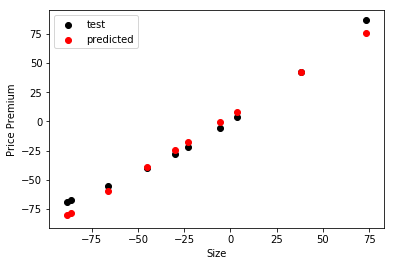

In [22]:
# Plot predicted ylabel (red) and true ylabel (black)
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)

_ = ax.scatter(X_test, y_test, color='black', label="test")
_ = ax.scatter(X_test, y_pred, color="red",   label="predicted")
_ = ax.set_xlabel(xlabel)
_ = ax.set_ylabel(ylabel)
_ = ax.legend()

Since model is linear, we connect the fitted points into a fitted line

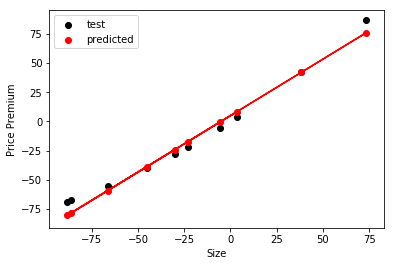

In [23]:
# Plot predicted ylabel (red) and true  (black)
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)

_ = ax.scatter(X_test, y_test, color='black', label="test")
_ = ax.scatter(X_test, y_pred, color="red",   label="predicted")

_ = ax.plot(X_test, y_pred, color="red")
_ = ax.set_xlabel(xlabel)
_ = ax.set_ylabel(ylabel)
_ = ax.legend()

#### What do the errors tell you

- The differences between predictions (red line) and actual (black dots) seems biggest in the tails

We will have a lot more to say about Error Analysis later on.

For now: suffice it to say that you sometimes learn more from your failures than from your successes.

### Machine Learning versus "Statistics"

- In Machine Learning, the Performance Metric is evaluated out of sample
- In Statistics, we often evaluate this measure in sample

Is Statistics just Machine Learning where the Test and Training sets are the same ?

Let's look at how well we did in sample

In [24]:
# Lots of predictions: predict on entire TRAINING set
y_pred_train = regr.predict(X_train)

# The mean squared error
rmse_train = np.sqrt( mean_squared_error(y_train,  y_pred_train))
print("(train) Root Mean squared error: {:.2f}".format( rmse_train ) )

# Explained variance score: 1 is perfect prediction
print("(train) R-squared: {:.2f}".format(r2_score(y_train, y_pred_train)) )

(train) Root Mean squared error: 6.56
(train) R-squared: 0.98


- In sample RMSE, $R^2$ similar to out of sample
 
- The larger errors in the tails shows up in the taining set too

If you don't do well in-sample, it's hard to imagine that you'll do better out of sample.

So it is often helpful to look at errors in the training sample.

Stated another way
- Statistics is often concerned with *explanation* (of the past)
- Machine Learning is concerned with *prediction* (of the future_

Before we dismiss Statistics, it is a highly disciplined field that we can learn from
- emphasis on *confidence intervals*
    - everything is an estimate (e.g., our parameters)
    - what is the range of likely values
        
This is sadly missing from parts of Machine Learning
- particularly Deep Learning (it's just too expensive to compute confidence intervals)
- we will introduce Cross Validation as a proxy for confidence intervals

### Iterative improvement
- Our model is pretty good !
    - Do we need to iterate in this case ?
        - decent RMSE, but clearly a problem in the tails
    - In general: you will observe where the model did well and did less well
        - will lead you to a new experiment
            - Feature iteration
                - adding a previously discarded feature
                - creating a synthetic feature
            - Hypothesis iteration
                - maybe a Linear model with a single parameter is not best ?
                    - how about a second order model (e.g., $X$ and $X^2$ as features
                - maybe a different model would be better (e.g., Tree)
                
Hopefully, we've made our point with the toy example and we won't iterate further.

## Fine-tuning your model

Once we are satisfied with our Hypothesis, there may be some "knobs" to adjust for even better results

- Hyper-parameters
- GridSearch
- Ensembles

- We will visit this later

# What if our data is not linear ? 

## Make it linear: transformations

Suppose we're given a different dataset.  

Let's try out our recipe and see what changes might be needed

Here's what the first dataset looked like


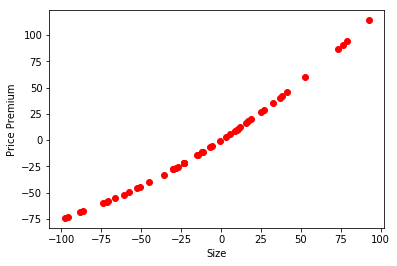

In [25]:
X_orig, y_orig = X_lin, y_lin 

rh.gen_plot(X_orig, y_orig, xlabel, ylabel)

And here's what the new dataset looks like

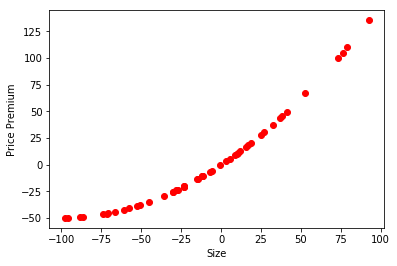

In [26]:
v2, a2 = v1, a1*2
X_curve, y_curve = rh.gen_data(num=50, v=v2, a=a2)
rh.gen_plot(X_curve,y_curve, xlabel, ylabel)

Hmm.  Looks like a lot more curvature, maybe we need a better hypothesis than a linear model ?

Let's verify this by seeing the result on the linear model.


- **Gotcha**: beware of re-evaluating an earlier cell that references a variable that was changed in a later cell !
    - I use the variables `X_train, X_test, y_train, y_test` for both the first and second example
    - If, after running the second example, I re-run a cell associated with the first: confusion !


Here's our linear model on the original data

Coefficients: 
 [4.93224426] [[0.96836946]]


R-squared (test): 0.98
Root Mean squared error (test): 6.86


R-squared (train): 0.98
Root Mean squared error (train): 6.56


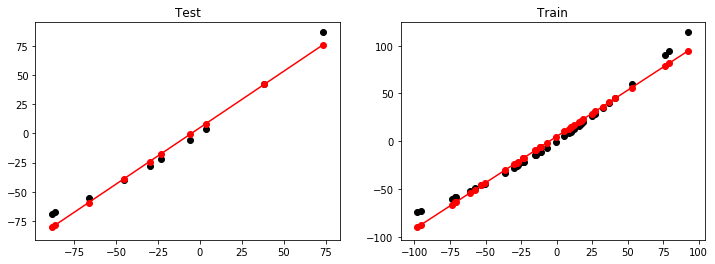

In [27]:
rh.run_regress(X_orig, y_orig)

And now here's our linear model on the new "curvier" dataset

Coefficients: 
 [9.86448852] [[0.93673892]]


R-squared (test): 0.91
Root Mean squared error (test): 13.73


R-squared (train): 0.91
Root Mean squared error (train): 13.13


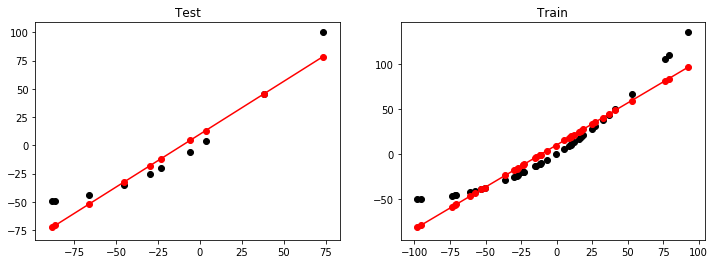

In [28]:
rh.run_regress(X_curve, y_curve)

Not terrible, but clearly room for improvement, compared to the original dataset.
- the $R^2$ is still over 90%
- but the RMSE is twice as big

<div class="alert alert-block alert-success">
<b>TIP</b>
<br>
    <ul>
        <li>Don't stop just because you scored 91%. And don't give up if the score was awful.</li>

<li>Examining the errors (residuals) reveals alot about how to improve your model.
     <ul>
    <li>Where was the fit good ? Where was it bad ? </li>
    <li>Is there a pattern to the badly fit observations that points to a missing 
         feature ?</li>
          </ul>
    </li>
</div>

One of the real arts of ML is diagnosing model deficiencies and knowing how to improve them.

We will have a separate module on this topic.

Looks like a second degree polynomial might be a better hypothesis to explain our data.

$$ y = \beta_0 + \beta_1  x + \beta_2  x^2$$

Let's modify $\x^\ip$ from a vector of length 1:

$$
\x^\ip = (\x^\ip_1)
$$

to a vector of length 2:

$$
\x^\ip = (\x^\ip_1, {\x^\ip_1}^2)
$$

by adding a squared term to the vector $\x^\ip$, for each $i$.

The modified $\X'$ becomes:

$$
\X =
\begin{pmatrix}
  1  &\x^{(1)}_1   &  (\x^{(1)}_1)^2 \\ 
   1 &\x^{(2)}_1   &  (\x^{(2)}_1)^2\\ 
   \vdots & \vdots &                \\
   1 &\x^{(m)}_1   &  (\x^{(m)}_1)^2\ \
  \end{pmatrix}
$$


Note that this modified $\X'$ fits perfectly within our Linear hypothesis
$$
\hat{\y} = \X' \Theta
$$

The requirement is that the model be linear in its *features*, **not** that the features be linear !

What we have done is added a second feature, that just so happens to be related to the first.

We can now run our linear model with the modified feature vectors

**A word about our module**
- we add the $x^2$ column by setting optional parameter `run_transform` to `True`


Coefficients: 
 [-7.10542736e-15] [[1.    0.005]]


R-squared (test): 1.00
Root Mean squared error (test): 0.00


R-squared (train): 1.00
Root Mean squared error (train): 0.00


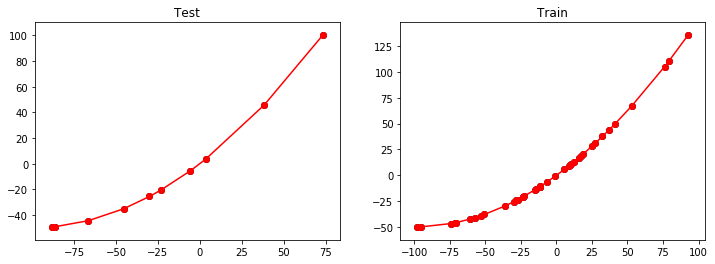

In [29]:
rh.run_regress(X_curve, y_curve, run_transforms=True)

Perfect fit !



# Feature engineering (intro)

Transforming data may be **the most important** step of the multi-step Recipe !

It is often the case that the "raw" features given to us don't suffice 
- we may need to create "synthetic" features.  
- This is called **feature engineering**.

In our case, the squared feature was key.

There will be other reasons for transforming the data (e.g., accomodating model assumptions).

Some of these transformations may *alter* the raw features rather than just augment them.

Transformations will be the subject of a separate lectrue.

For this lecture, we will focus on *mechanics*
- Transformations often occurs as a series (called a pipeline)
    - `sklearn` and other API's often faciliate building pipelines
- Whatever transformations you apply to the Training set *must also be applied* to the Test set !
    - It's easy to accidentally "cheat" and mis-use the Test data in training
- Transformed data may alter raw features (e.g., modify dimensions, like the scale)
    - your predictions will then be in the space of "new" dimensions
    - you will need to invert the transformations to recast the predictions into original dimensions

## Transform both training and test data in the same way !

Let's examine the code we used to create the new feature:


` # Transform X's
    if (run_transforms):
        X_train = transform(X_train)
        X_test  = transform(X_test)
`

Clearly, we have to tranform `X_train`, but why did we transform `X_test` ?

**Feature engineeering lesson 1:** the same features should be present in training and test !
- the whole purpose of adding the feature was to aid *prediction* so must be in test set too.

## No cheating  in Feature Engineering either !

Remember, we had set aside a set of Test Data with the promise to only look at it once.

But considering that we need to apply an *identical* transformation to both the Train and Test data sets,
wouldn't it be convenient to combine this into one step ?
- e.g., convert from levels to percent changes


You may have noticed our module did **not** combine the transformations of `X_train` and `X_test`


`X_train, X_test, y_train, y_test = split(X,y)`  
    
\# `Transform X's`

`if (run_transforms):
    X_train = transform(X_train)
    X_test  = transform(X_test)
`

This was very deliberate.

Couldn't we have just transformed `X` before splitting ?

    if (run_transforms):
        X = transform(X)
    
    X_train, X_test, y_train, y_test = split(X,y)  


**Question**: Why might this be a bad idea ?

Transforming `X` before splitting
- creates the *possibility* of leaking information from Test to Train
- That would amount to "cheating"

Consider a "missing value" transformation to replace missing values with the mean:
- `X.mean()` includes information about `X_test` !
- so replace missing values in `X_train` with `X_train.mean()` **not** `X.mean()`
   

- also replace missing values in `X_test` with `X_train.mean()`
    - **not** a typo ! Why use `X_train.mean()` to replace values in `X_test` ?   
 
**Feature engineeering lesson 2:** 

Apply the *same* transformations to Train and Test, but *independently*

This was our first (but hardly our last) Data Transformation.  Lots more to come.

## Pipelines

We applied only a single transformation but, in general, there may be *multiple* transformations to apply.

We have to run an **identical** sequence of transformations on the train and test datasets.

I did this above via the `transform` routine, that encapsulates all the transformations so we can apply them to both train and test consistently. 

So `transform` will become:



def transform(X):

    X_1 = run_transform_1(X)
    X_2 = run_transform_2(X_1)
        ...
    X_n  = run_transform_n(X_{n-1})
    
    return X_n
`

This is called a transformation "pipeline".

My implementation is less than ideal.

A good architecture like **sklearn** will supply a rich library of independent transformations and a simple way to construct pipelines


<img src=images/ML_process_pipeline.jpg>

### Pipelines in sklearn



In [30]:
X_curve, y_curve = rh.gen_data(num=50, v=v2, a=a2)


X_train, X_test, y_train, y_test = rh.split(X_curve,y_curve)

xfit = np.linspace(0, 10, 1000)

from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing as pre_proc

# Create the Pipeline
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(pre_proc.PolynomialFeatures(2),
                           linear_model.LinearRegression())

x=None
y=None

# Fit the model, running the data transformation first
poly_model.fit(X_train.reshape(-1,1), y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [31]:

# Prediction based on test set
y_pred = poly_model.predict(X_test.reshape(-1,1))

# In and out of sample scores
print("Score (train): ", poly_model.score(X_train.reshape(-1,1), y_train))
print("Score (test): ",  poly_model.score(X_test.reshape(-1,1),  y_test))

# Accessing just PART of the Pipeline: the last (i.e, regression) step
print("Last element of pipeline:", poly_model.steps[1])
regr_ = poly_model.steps[-1]

# NOTE: this accesses the last element of the pipeline WITHOUT having run the earlier steps !  So no Polynomial transformation !
print("Score (test, via LinearRegression object): ",  regr.score(X_test.reshape(-1,1),  y_test))

Score (train):  1.0
Score (test):  1.0
Last element of pipeline: ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))
Score (test, via LinearRegression object):  0.8671060075570477


R-squared score (test): 1.00


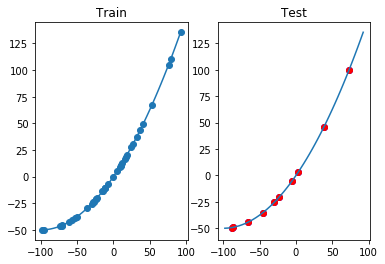

In [32]:
# Plot the results
# Create a figure
fig = plt.figure()

# Create a histogram for X.  The figure will be 1 row by 2 columns and the plot for X will be in column 1
ax = fig.add_subplot(121)
_= ax.scatter(X_train,y_train)

xfit = np.linspace( X_train[:,0].min(), X_train[:,0].max()).reshape(-1,1)
yfit = poly_model.predict(xfit)
_= ax.plot(xfit, yfit);
_= ax.set_title("Train")

ax = fig.add_subplot(122);
_ = ax.scatter(X_test, y_test, color="blue")
_ = ax.scatter(X_test, y_pred, color="red")

_ = ax.plot(xfit, yfit)
_= ax.set_title("Test")


print("R-squared score (test): {:.2f}".format(r2_score(y_test, y_pred)) )

That was a handful ! Let's break it down into smaller bites.



`make_pipeline` creates a "pipeline" which we assign to `poly_model`

The pipeline has two steps:
- `pre_proc.PolynomialFeatures(2)`
    - creates polynomial features up to degree 2
- `linear_model.LinearRegression()`
    - this actually runs the linear regression !
        - In addition to `fit` and `predict` methods, models can also do `transform`

Let's examine the internals of the Pipeline object

In [33]:
poly_model.steps
poly_model.steps[-1]

[('polynomialfeatures',
  PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)),
 ('linearregression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False))]

('linearregression',
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False))

- `poly_model.steps`
    - An array of steps of the pipeline
- `poly_model.steps[-1]`
    - The last step in the pipeline, e.g, `LinearRegression`
- Note in my code how I extracted the last step and used it indepdently of the pipeline:

`

[Here's](external/PythonDataScienceHandbook/notebooks/05.04-Feature-Engineering.ipynb#Feature-Pipelines) a slightly longer pipeline from VanderPlas.


- `Imputer` to deal with misssing values
- `PolynomialFeatures(degree=2)`
- `LinearRegression()`

#### Advanced Pipelines: FeatureUnion

A pipeline successively applies transformation, starting with the input, and resulting in a transformed output.

You can create separate pipelines and join their outputs (horizontally) using `FeatureUnion1


- Separate pipelines to deal with distinct subsets of column types (numeric and non-numeric)
- First step in each pipeline is to restrict the inputs to the relevant columns
- So net effect is: one set of transformations for numeric columns and a separate set for non-numeric

# Create a test set and put it aside (re-visited)

- Why did we shuffle the data before splitting ?
- *When* to shuffle

# Validation and Cross-Validation

- Why did we separate out a test set from our complete dataset ?

- Recall our goal is good, out-of-sample prediction.  And the test set is our benchmark for generalization.
- If we look at the test set in the middle of our process, it will influence our final model.  
- We may thus wind up with a good score on the test set, but generalize poorly to a completely unseen observation.

- It's like seeing the answers to an exam in advance ! Don't do it !  
- You can only look at it *ONCE*, when you're all done, if you want a truly honest indicator of generalization.

## Validation

[Geron notebook](external/PythonDataScienceHandbook/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb#Thinking-about-Model-Validation)

- But wait ! During our iterative process we looked at the test data many times. 
    - e.g., motivated the selection of an alternate model
- We also used the training data many times
    - danger of overfitting to the training set ?

What can we do ?

- Answer: Split the *training set* into two pieces
    - a smaller training set
    - a *hold-out* piece called the *validation* set
        - the validation set serves a similar role to the test set; it's out of sample
        - it is used to see how well the model generalizes
        - you can use the validation set *many* times (sort of) during your iterative process
            - unlike the test set, which you may look at only once, at the end
        

**Aside**

So much splitting of data !

Rather than using my own, hand-rolled splitter, we will henceforth use sklearn's `train_test_split` function.


## Cross-Validation

Splitting into a smaller training set, and a validation set, is a step in the right direction as it allows you to evaluate out of sample predictions without peeking into the test set.

You might still be uncomfortable with the idea of a validation set that is used many times.  Rightly so.
- We can wind up over-fitting to the validation set.  Isn't that cheating too ?
- The smaller training set is smaller -- a problem if we don't have much training data to begin with.
- The validation set is just *one* sample. 
    - How do we know the Performance Measure on this one sample is representative ?
    - Where are the error bars or confidence intervals for this statistic ?
    
Cross-Validation to the rescue !

**K-fold cross-validation**
- Split the training data into $K$ pieces (called *folds*. so K-fold means $K$ pieces).
- Select one fold as the validation set, and use the other $(K-1)$ folds as the smaller training set
    - Fit the model on the smaller training set
    - Evaluate the Performance measure on the fold selected as the validation set
- Repeat the above $(K-1)$ times, using a different fold as the validation set each time.

Here's the picture

![](images/Cross_Validation_Split.jpg)


At the end, you will have fit the model $K$ times, using $K$ different out of sample sets.

This reduces the tendency of training to overfit to a single validation set.

- This gives you $K$ values for the Performance Measure
- These $K$ values form a probability distibution of Performance Measures
- Use this distribution in order to create a "confidence interval" for the Performance Measure
- This is akin to the statistical confidence interval for in-sample estimators

Typically, we report the average of the $K$ Performance Measures as our final Performance Measure.

But it is also valuable to look at the range (e.g., standard deviation) to get an idea of how much it can vary.

A model with a smaller range is more confident that one with a wider range.


This sounds like a lot of work.

Fear not !

sklearn has a function to do this for us: `cross_val_score`

`from sklearn.cross_validation import cross_val_score`

`scores = cross_val_score(model, X, y, cv=5)`
 
This will do $5$-fold cross-validation (`cv=5`) on `model` using training features `X` and targets `y`.

It will return $5$ scores, one per validation fold.

**In general you should be using Cross Validation in Classical ML** in the absence of a good reason not to !
- helps you determine stability of your model's predictions
- once we get to Deep Learning: 
    - training may be so expensive as to preclude the use of Cross Validation

**ASIDE**
Recall that there are several steps in creating a model, including
- data preparation
- data transformations
- fitting

You need to run *all* these steps each time you train the model.  

In K-fold cross-validation, you are training a model $K$ times.  

How do we get `cross_val_score` to run all these steps for us, each time ?

Pipelines ! (Introduced [above](Recipe_for_ML.ipynb#Pipelines))

The trick is to include your model as the *last* step of the Pipeline.  

Models are just like other transformations in that they respond to `fit`, `transform` and `fit_transform` methods.

Running a Pipeline just calls `fit_transform` on each member in sequence.  

All but the last massage your data.  But the last (the model) will actually fit our model !

# Selecting a model (another re-visit)


sklearn has LOTS of models to choose from.  We will explore many (but not all) of them.

Your goal should be to understand *how* a model does it fitting (i.e., model math) so that you can determine
- what is the right model to use for my data
- what transformations of my data will make my model perform better

You can explore Linear Regression in depth [in this VanderPlas notebook](external/PythonDataScienceHandbook/notebooks/05.06-Linear-Regression.ipynb)

# Challenges: Overfitting and Underfitting

## Overfitting

We had great sucess when we created second order polynomial features.

Why stop at order 2 ?

Below we will create a simple-to-describe target ($\textrm{sin}(x)$) with a complex shape and try to fit it with a higher order polynomial.


In [34]:
# Fit a higher order (degree) polynomial
xfit = np.linspace(0, 10, 1000)

from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline
degree = 7
poly_model = make_pipeline(PolynomialFeatures(degree),
                           linear_model.LinearRegression())
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

_= poly_model.fit(x[:, np.newaxis], y)

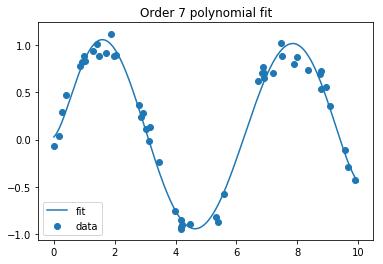

In [35]:
# Plot the fit of the high order polynomial
yfit = poly_model.predict(xfit[:, np.newaxis])

_= plt.scatter(x, y, label="data")
_= plt.plot(xfit, yfit, label="fit");
_= plt.title("Order 7 polynomial fit")
_= plt.legend()

Why stop at 7 ?  Why not 100 ?

We can fit an arbitrary function with a spline or polynomial of high enough degree
- basis function regression

But is this "learning" or memorization ?
- with a high enough degree, we will start to "memorize" the training set
    - even down to the noise !
- won't generalize well


This is known as *over-fitting*
- Symptom: When test score is much worse than training score

It may be an indication that your model has merely memorized the training data.

It may have failed to learn anything that will aid generalization

Even worse, your training data is often noisy (e.g., minor measurment errors)

A model with too many degrees of freedom will reproduce the noise !

## Underfitting

Just as having too many parameters can hurt, having too few can hurt as well.

This is known as *under-fitting*
- Symptom: When test score is much *better* than training score

It is not so much doing harm as failing to do as good a job as possible in fitting.

How do we know that we may have underfit ?

One way is by having a *prior belief* as to what a good training error should be.

If our model's error is much worse than this, we should try to improve the fit.

What can form the basis for this belief ?
- The results of an alternate model
    - Perhaps you have developped a previous model, which gives you an upper bound on a good error
    - You know what a competitor's model training error is
- Human performance ?

# Testing for over/under fitting

*Overfitting* is a problem because it means that $\Theta$ has been made overly sensitive to the training examples.

It is unlikely to generalize (i.e., predict out of sample) well.

*Underfitting* is a problem because it means your model may be able to be improved

Let's see how to deterimine whether we have an overfitting or underfitting problem.

## Compare Cost on Training  and Test sets

Remember, our optimization objective was to minimize Cost.

Let's evaluate, both on the training set (where it is actually used)
and on the test set (for comparison)

Coefficients: 
 [4.93224426] [[0.96836946]]


R-squared (test): 0.98
Root Mean squared error (test): 6.86


R-squared (train): 0.98
Root Mean squared error (train): 6.56


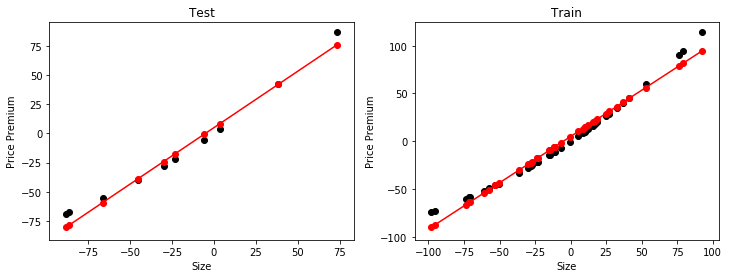

In [36]:
rh.run_regress(X_lin, y_lin, xlabel=xlabel, ylabel=ylabel)

As you can see: the Cost (RMSE, or the related R-squared) is nearly identical between
the two sets.

This means that our in sample and out of sample predictions have roughly the same quality, so it's
unlikely that we overfit.

But perhaps we underfit ?  Could we have made the model more accurate ?

We sum this up with a topic refered to as the Bias/Variance tradeoff.

## The Bias Variance Tradeoff

So far we have warned about the dangers of overfitting (*high variance*)

But it's also possible to underfit: to have a training error that is too high. (high *bias*)

We can quantify these concepts in terms of the relationship between the Training Error and the Validation Error.

### High Variance
- if Training Error $<<$ Validation Error
    - overfit: poor generalization out of sample
        - model may be too complex relative to quantity of Training Data
            - simplify model (fewer parameters)
            - use regularization to reduce number of non-zero parameters
            - increase Training Data (e.g., data augmentation)

### High Bias
- if Training Error $>$ Validation Error or Training Error seems "high"
    - underfit: sub-optimal performance in sample
        - try a more complex (more parameters) model
        - train model longer (assuming optimization via search, rather than closed form solution)
        - what is "high" ? Compare to a baseline model

## Regularization: reducing overfitting
What can we do to combat over-fitting ?

Recall that LinearRegression model is optimizing a Loss Function $\loss$
which was initially identical to the performance metric MSE in our example.

We will create a *weighted penalty* term 

$$P = \alpha Q$$
where $Q$ is a function of $\Theta$ in order to impose a cost on using too many degrees of freedom.

The new loss function becomes
$$
\loss' = \loss + \alpha Q
$$

The weight $\alpha$ balances the original Cost fuction with the penalty.

Observe that the new Loss function is **no longer identical** to the performance metric, which
remains unchanged.

We'll show several modified Regression models and identify the penalty used.

### [Ridge Regression](external/PythonDataScienceHandbook/notebooks/05.06-Linear-Regression.ipynb#Ridge-regression-%28$L_2$-Regularization%29)

Penalty is: sum (over parameters) of squared parameter value

$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$

Also known as $L_2$ regularizer.

This tends to push parameters $\theta_n$ towards smaller values.

### [Lasso Regression][1]
[1]: external/PythonDataScienceHandbook/notebooks/05.06-Linear-Regression.ipynb#Lasso-regression-($L_1$-regularization)


Penalty is: sum (over parameters) of parameter's absolute value
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$

Also know as the $L_1$ regularizer.

This tends to push parameters $\theta_n$ towards 0

<div class="alert alert-block alert-success">
    <b>TIP</b> 

- Know your Cost Function !  
    - This is what is driving your model's fitting process.  Does it make sense for your problem ?

- Don't try to force a square peg into a round hole.
</div>


# Error analysis

The Average Cost and the Performance Measure are just summary statistics: 
- one value that summarizesa distribution.

- There is a lot of potentially valuable information lost in the summary.

Let's examine the *individual* errors, rather than the summary, when we fit our "curvy" data set with a simple line.

Coefficients: 
 [9.86448852] [[0.93673892]]


R-squared (test): 0.91
Root Mean squared error (test): 13.73


R-squared (train): 0.91
Root Mean squared error (train): 13.13


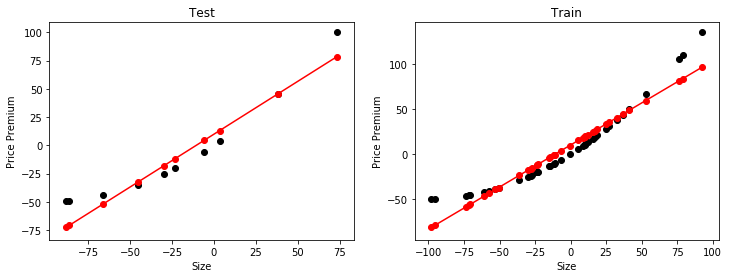

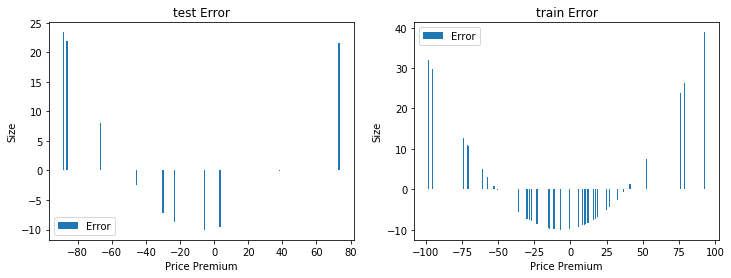

In [37]:
rh.regress_with_error(X_curve, y_curve, xlabel=xlabel, ylabel=ylabel)

As you can see, lurking beneath a pretty good Performance Measure (0.91) is a distinct pattern in the
errors:
- positive errors at the extremes
- negative errors in the center.

Might this be a problem ?

Definitely !

When we learn more about Linear Regression, we will discover that this pattern of errors violates one
of the statistical assumptions behind the model (i.e., for fitting on the training set).

Moreover, the errors are biased in that they are a function of the feature magnitude.  This may not be
a satisfactory prediction for our particular use case.


Fortunately, we already know how to fix this problem.

**Bottom line** 
- Don't be satisfied with a summary statistic
- There is valuable information in the errors: use it to improve your model

We will spend more time on this topic in a subsequent lecture.

# Fine-tuning  your model (Geron, last part Chapt 2)
- GridSearch

- RandomizedSearch

- Ensembles

- Analyze models and errors
    - parameter interpretation

## Hyper-parameter search

In addition to the "learned" parameters (e.g., $\Theta$) there are a number of parameters to the learning
process itself.  Among the ones we've seen so far
- Strength of regularization penalty
- Number of folds for cross validation
- Degree of the polynomial features

How do we choose values for these *hyper parameters* ?

One way is by searching through a space of possible values.

`sklearn` makes this easy via the `GridSearchCV` method, which we briefly describe.

[`sklearn` GridSearchCV documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html)

 `GridSearchCV` will create an object (which turns out to be an estimator).
 
 In creating this object, we specify 
 - an instance $e$ of an estimator
 - a dictionary
     - whose keys are names of parameters to $e$
     - whose values are a list of possible values for the parameters
     

Since the object is itself an estimator, we can invoke the `fit` method by passing it a training set.

Fitting the `GridSearchCV` estimator does the following
- it creates every possible combination of parameter values in the dictionary
- for each combination, it performs Cross Validated fitting of the estimator $e$

So it fits estimator $e$ many times, one for each possible parameter combination across the 
multi-dimensional space of hyper-parameters.

Hence the name: Grid Search.

One can then have Grid Search report summaries as well as the best combination of parameters.
    

## Randomized search in `sklearn`

[RandomizedSearchCV documentation](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization)

`GridSearchCV` searches the entire multi-dimensional space of hyper-parameters, which can be very large and
therefore time consuming.

`sklearn` implements a randomized version of the exploration of the multi-dimensional space.

Instead of searching the grid exhaustively, it randomly samples combinations of hyper-parameters to try.

The user specifies how many samples are taken.

# Alternative to Randomized Search

The assumption underlying Randomized Search is that all points in the multi-dimensional space of 
hyper-parameters are equally likely candidates for being the best.

Like any other optimization problem, experience tells us this is not likely to be the case:
- Some parameters have less impact on the Performance Metric than others
- The values for a particular hyper-parameter that lead to high performance tend to be clustered rather than evenly distributed

Is there a way to improve Randomized Search ?

One idea is to partition the space of possible values of a hyper-parameter unevenly.

One can then try an equal number of values of the hyper-parameter in each partition
- the increment between values of a large partition are larger than for a small partition


For example suppose the range for hyper-parameter $p$ is $[0, 1000]$
- we create partitions using a logarithmic scale:
    - $[0, .001]$
    - $[.001, .01]$
    - $\vdots$
    - $[ 100, 1000 ]$

This would be consistent with our belief that the best values for $p$ are extremely small.

So we explore small values in smaller increments than the values between $100$ and $1000$.

# What does this have to do with Finance ?

- Stock market "beta": how much does a stock move, for a 1% move in the index ?
    - Typically calcuated using LinearRegression, with some window
    - But who says this is the "best" (gives best prediction) window ?
        - we can address this in Cross-Validation
- Multi-factor models
    - LinearRegression with multiple regressors

# Recap

- We learned our first model for a *regression* task
    - previously learned the KNN model for a *classification* task
- Importance of feature engineering
    - if all you have is a linear model: transform your data to make it linear
- Cross validation: out of sample analysis without cheating; confidence intervals
- Importance of Error Analysis
- The `sklearn` API

## The sklearn API

fit, transform

fit_transform

predict

[Scikit-learn cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

In [38]:
print("Done !")

Done !
